# Lab 8: Cluster Analysis
# Report by: Aseem Shaikh - 3177031

# Introduction: 
In this assignment, you will perform clustering analysis on three datasets, each containing two features. First we will perform a data analysis and then perform K-means Clustering on Dataset 1. Use silhouette analysis to determine the optimal number of clusters. Generate and display a dendrogram for the agglomerative hierarchical clustering algorithm, cut at the level of optimal k clusters determined by k-means clustering. Part 2 perform agglomerative hierarchical clustering on Dataset 1, Dataset 2, and Dataset 3 using four different linkage types: single, average, complete, and ward.

# Import Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import warnings

# Analysis of Dataset 1

In [89]:
dataset1_df = pd.read_csv('dataset1.csv', index_col=0)
dataset1_df

,X1,X2
0,-10.979873,-4.400657
1,-2.351221,4.009736
2,-6.875246,-4.001372
3,-7.489953,-6.494829
4,-2.760179,5.551214
...,...,...
1495,-8.026246,-9.580244
1496,-8.439024,-1.583618
1497,-10.624320,-3.181229
1498,-10.813260,-4.683275


In [90]:
#Other important analysis
print('Dataset 1 Description\n', dataset1_df.describe())
print('\nDataset 1 Info')
dataset1_df.info()
print('\nMissing Values\n', dataset1_df.isna().sum())

Dataset 1 Description
                 X1           X2
count  1500.000000  1500.000000
mean     -6.232241    -2.682810
std       3.135589     4.661393
min     -13.051477   -10.607120
25%      -8.591130    -6.112957
50%      -6.718760    -3.576407
75%      -4.113229     0.892471
max       1.661519     8.365093

Dataset 1 Info
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 35.2 KB

Missing Values
 X1    0
X2    0
dtype: int64


# Plotting

Text(0, 0.5, 'Feature 2 (X2)')

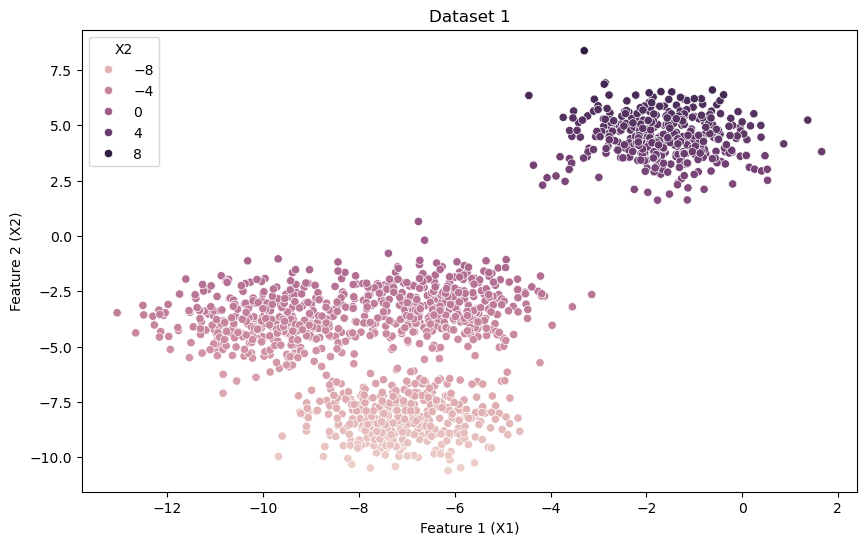

In [91]:
# Scatter Plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=dataset1_df, x='X1', y='X2', hue='X2')
scatter_plot.set_title('Dataset 1')
scatter_plot.set_xlabel('Feature 1 (X1)')
scatter_plot.set_ylabel('Feature 2 (X2)')

` It looks like this dataset has 3 clusters.`

# k-Mean Clustering

In [92]:
# Initialize KMeans with an arbitrary number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans model to the data
kmeans.fit(dataset1_df)

# Get cluster labels
cluster_labels = kmeans.labels_
silhouette =  silhouette_score(dataset1_df,cluster_labels)
print(f'KMeans with an arbitrary number of clusters 3 is {silhouette}')

KMeans with an arbitrary number of clusters 3 is 0.596962510586324


For n_clusters = 2, the average silhouette_score is : 0.7047609238906556
For n_clusters = 3, the average silhouette_score is : 0.596962510586324
For n_clusters = 4, the average silhouette_score is : 0.6285541393306969
For n_clusters = 5, the average silhouette_score is : 0.5093017342323468
For n_clusters = 6, the average silhouette_score is : 0.4220494214291892
For n_clusters = 7, the average silhouette_score is : 0.3795995357933134
For n_clusters = 8, the average silhouette_score is : 0.35588751492179077
For n_clusters = 9, the average silhouette_score is : 0.3592911323216888
For n_clusters = 10, the average silhouette_score is : 0.3205635326920583


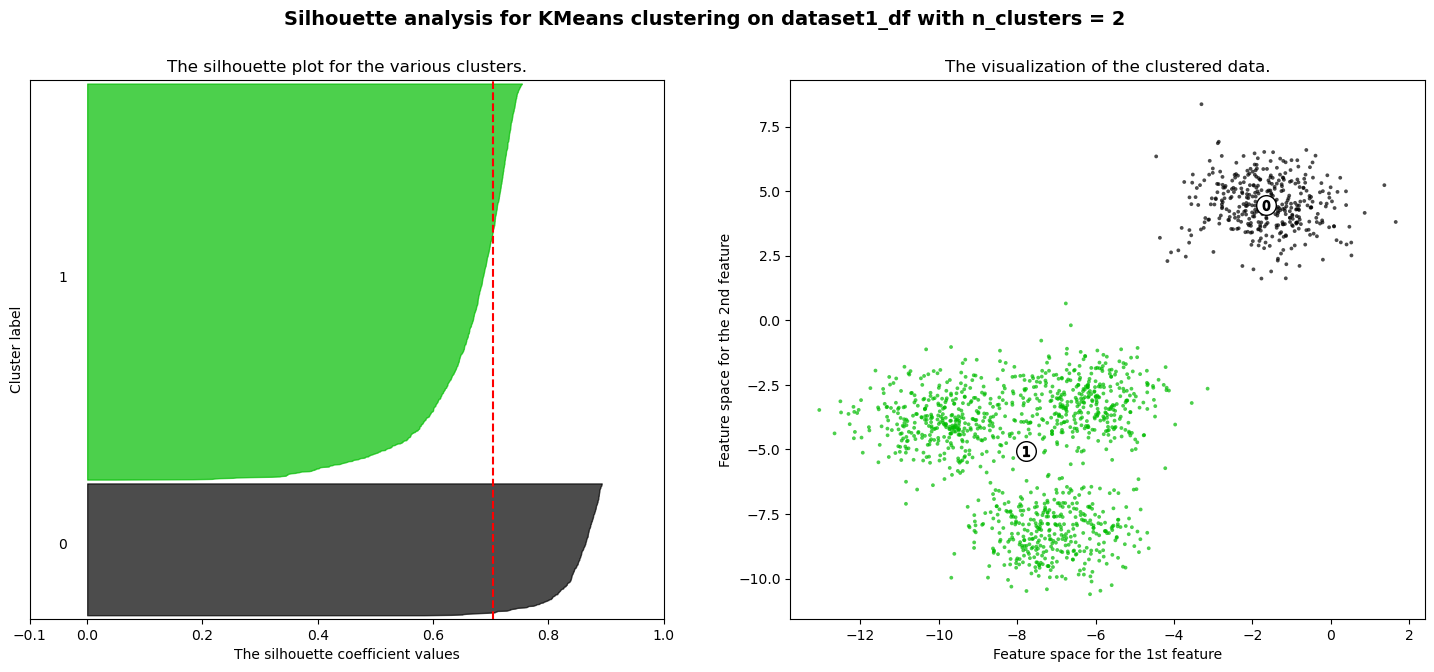

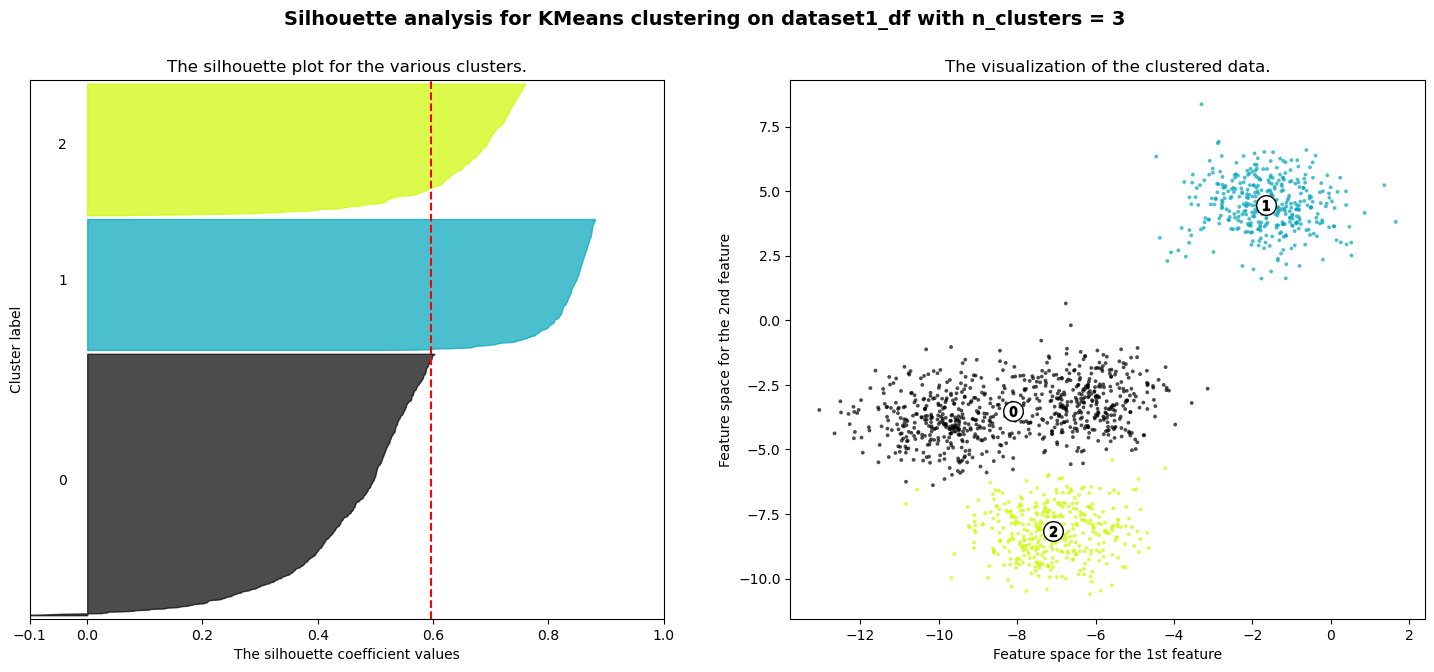

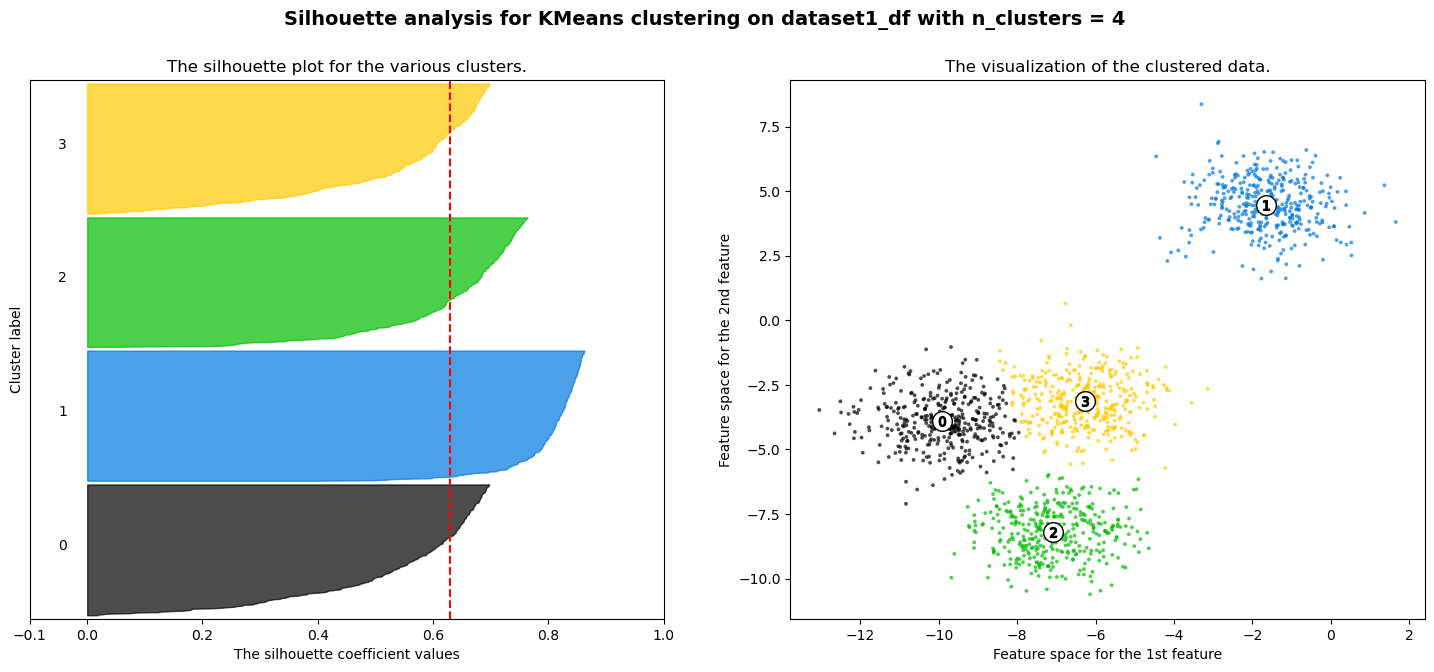

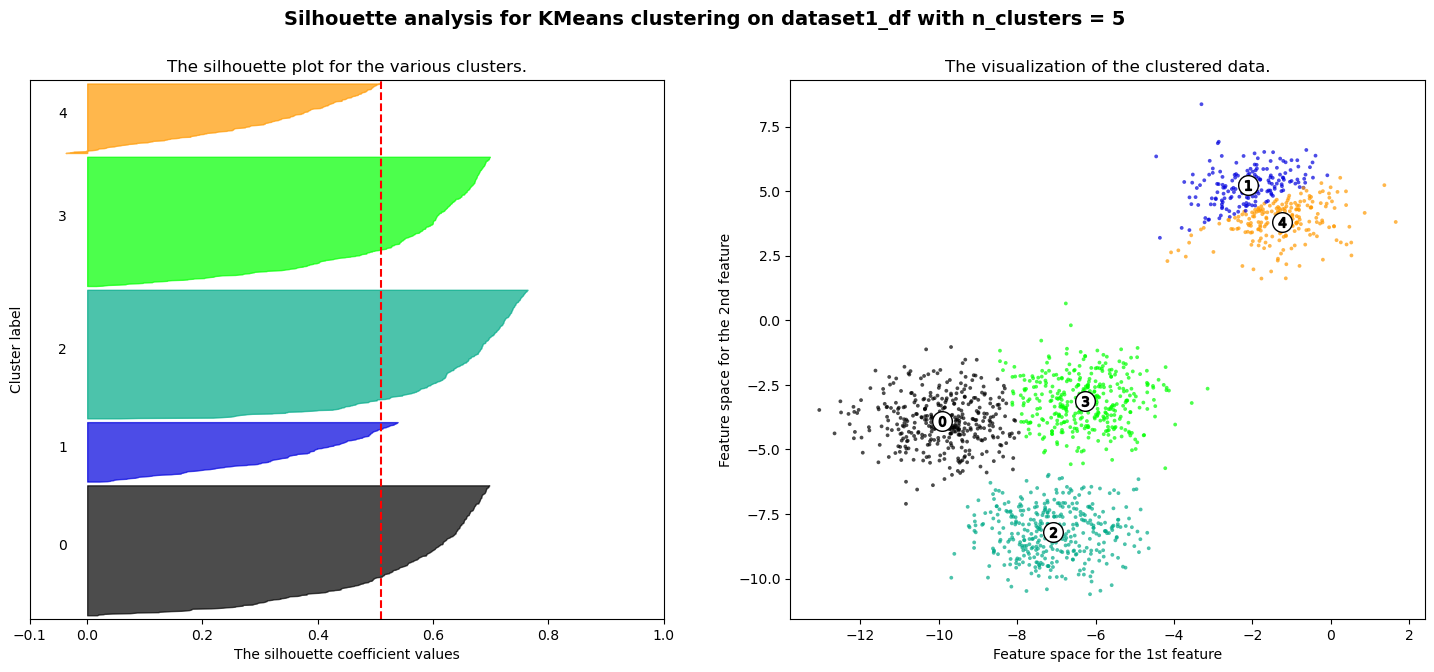

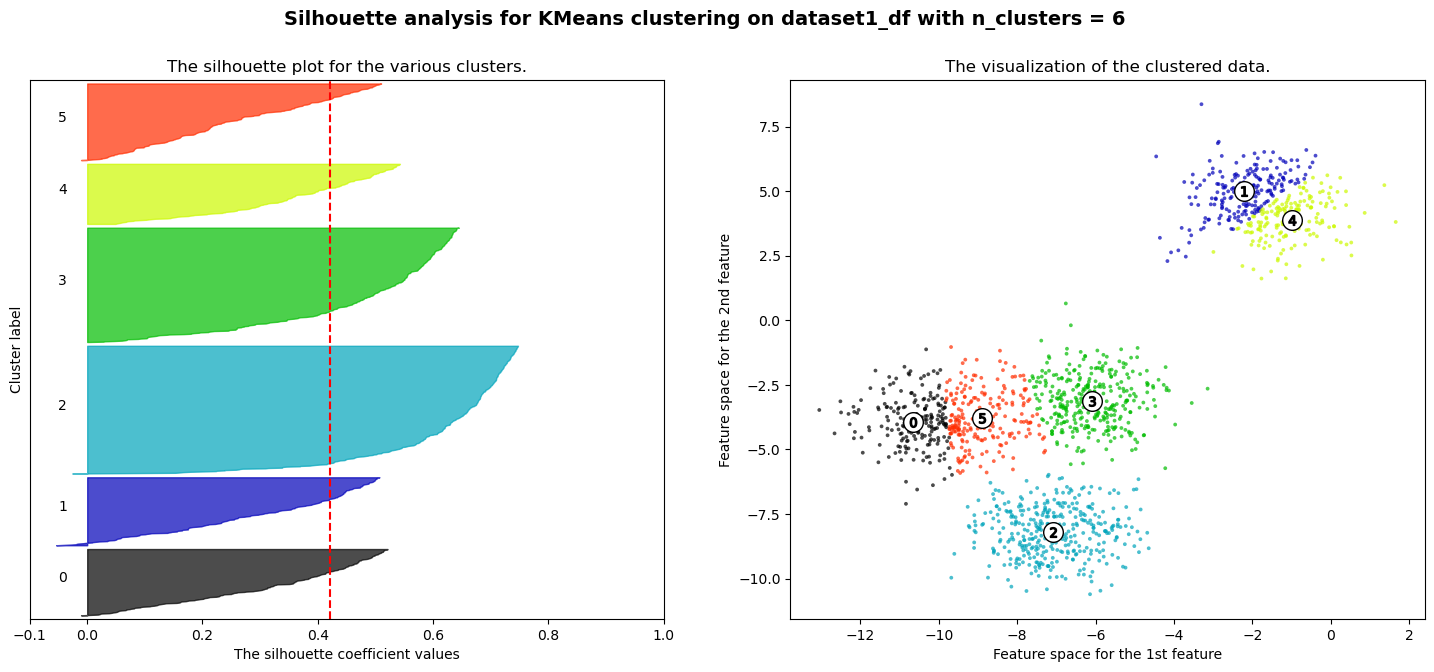

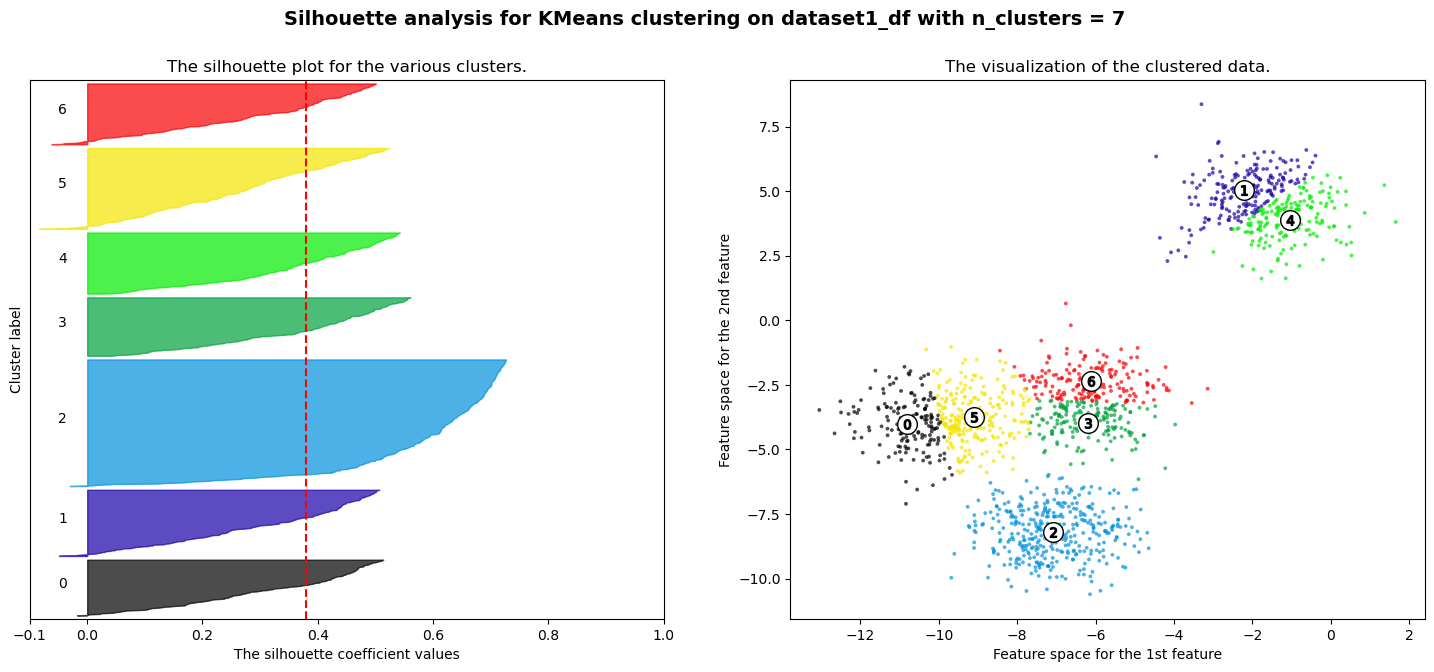

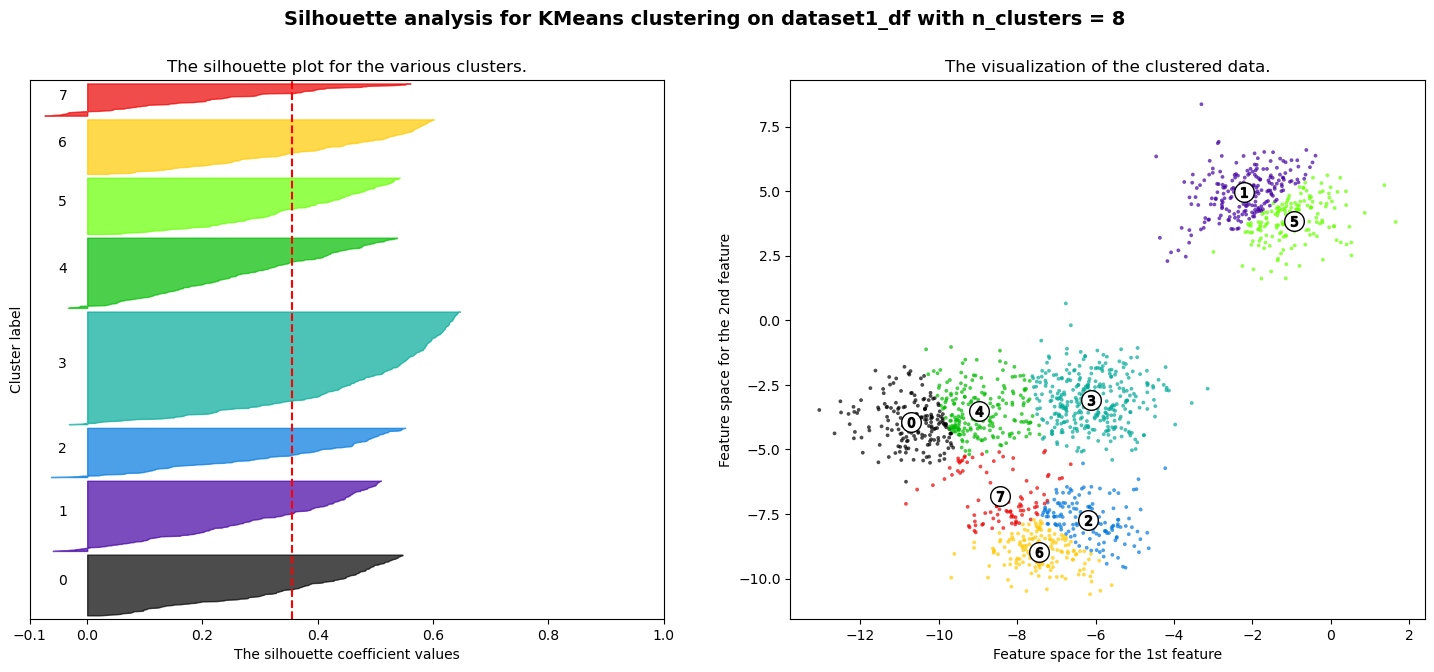

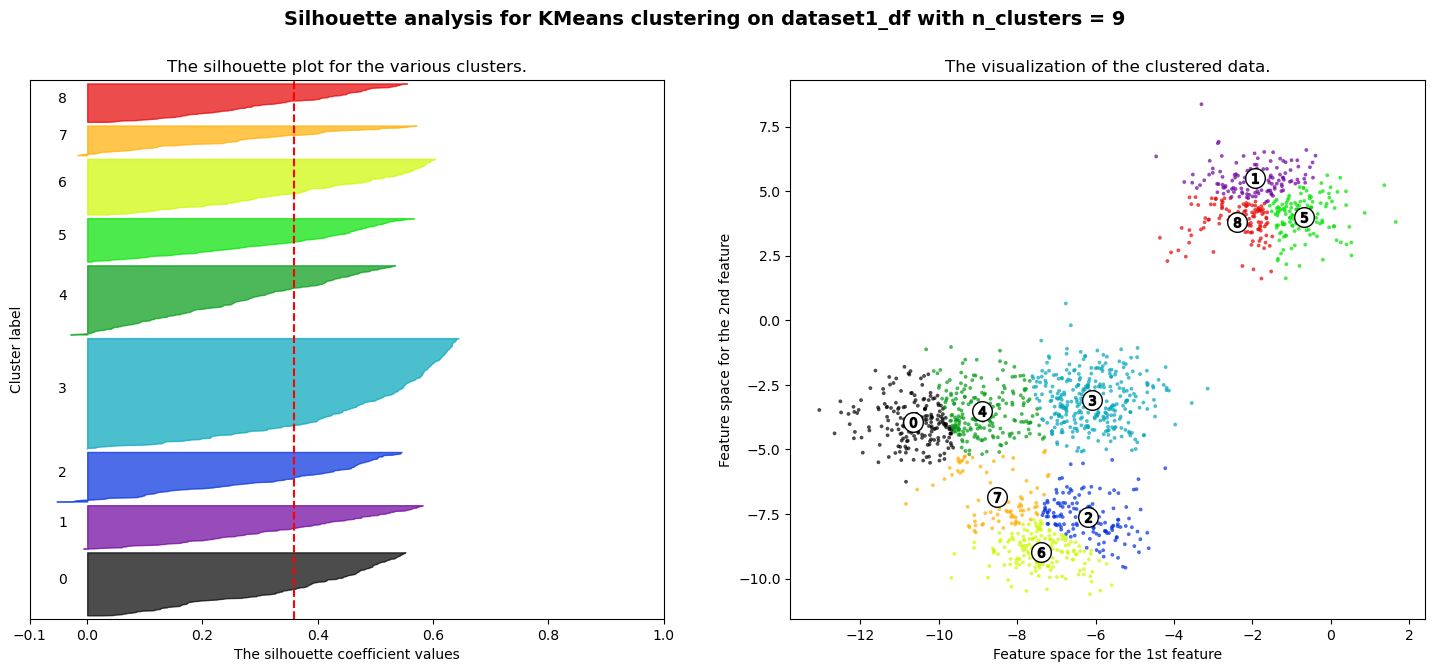

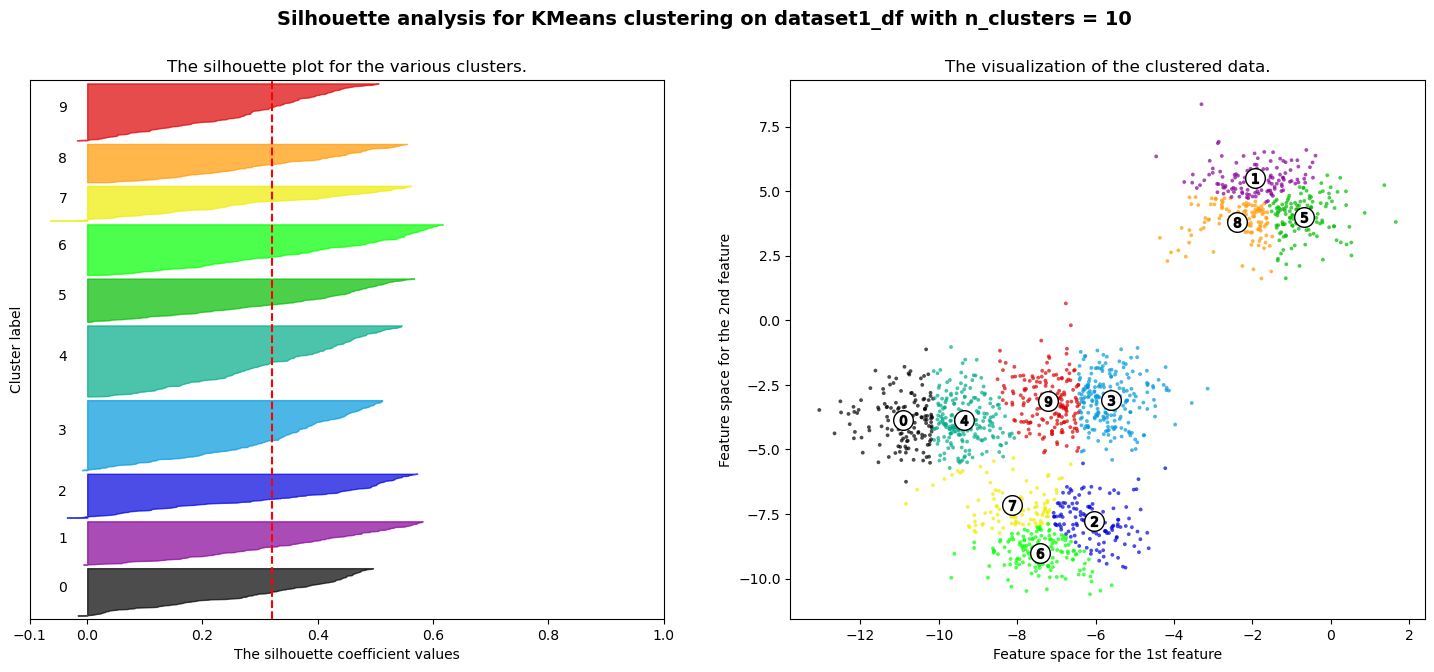

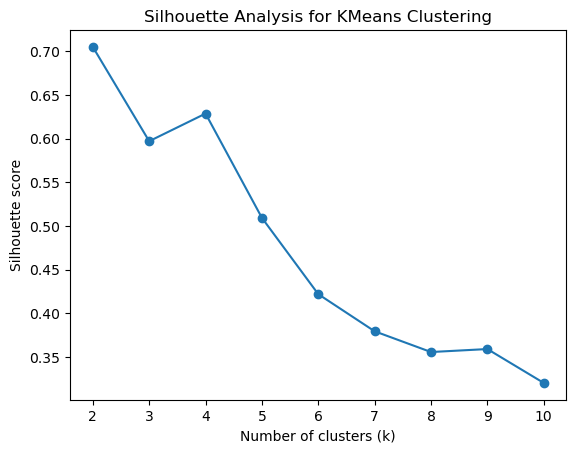

In [93]:
#silhouette analysis using k-mean clustering by testing multiple clusters
silhouette_scores = []

# Defining the range of clusters to analyze
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dataset1_df) + (n_clusters + 1) * 10])

    # Initialize the KMeans clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(dataset1_df)

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(dataset1_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset1_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate and sort silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset1_df.iloc[:, 0], dataset1_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7,
                c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on dataset1_df with n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()

# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.show()

Based on these scores, the highest average silhouette score is for number of clusters = 2 with a score of 0.7047609238906556.
Thus, the optimal number of clusters for your dataset based on silhouette analysis is 2.

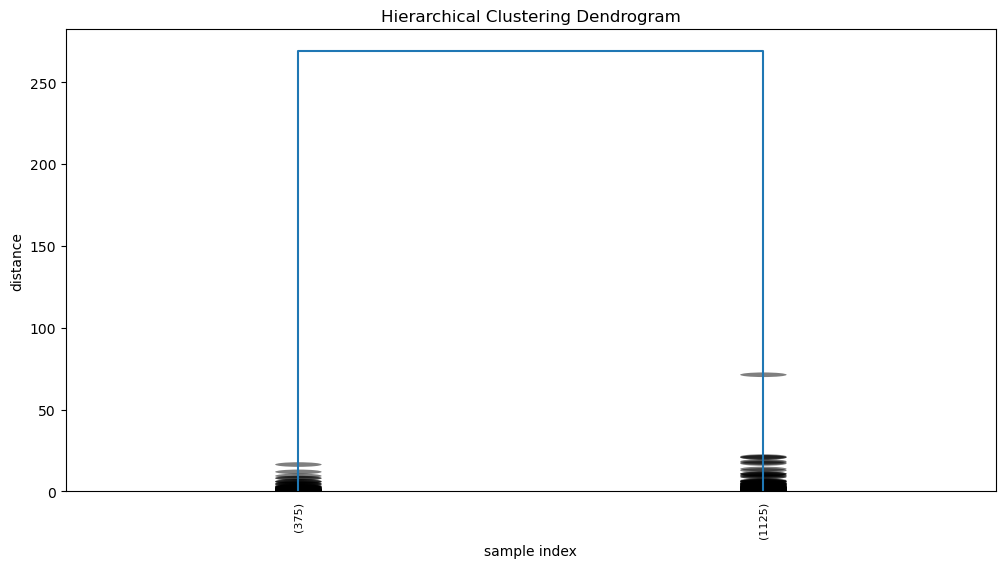

In [94]:
# Perform hierarchical clustering
optimal_clusters = 2
Z = linkage(dataset1_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, truncate_mode='lastp', p=2, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show()

# K-Means Clustering Analysis

#### Results and Silhouette Scores
The average silhouette scores for each number of clusters are as follows:

- For clusters = 2 , the average silhouette score is: 0.7047609238906556
- For clusters = 3 , the average silhouette score is: 0.596962510586324
- For clusters = 4 , the average silhouette score is: 0.6285541393306969
- For clusters = 5 , the average silhouette score is: 0.5093017342323468
- For clusters = 6 , the average silhouette score is: 0.4220494214291892
- For clusters = 7 , the average silhouette score is: 0.3795995357933134
- For clusters = 8 , the average silhouette score is: 0.35588751492179077
- For clusters = 9 , the average silhouette score is: 0.3592911323216888
- For clusters = 10 , the average silhouette score is: 0.3205635326920583

#### Analysis
1. Optimal Number of Clusters:
   - The highest silhouette score is obtained for clusters = 2 with a score of 0.7047609238906556, indicating that the best-defined clusters are achieved when the dataset is divided into 2 clusters.
   - This suggests that the dataset inherently has two distinct groups that are well-separated from each other.

2. Performance with More Clusters:
   - As the number of clusters increases from 2 to 10, the silhouette score generally decreases. This decrease indicates that the quality of the clustering diminishes with more clusters, possibly due to over-segmentation where clusters are forced even when natural groupings do not exist.
   - For example, at clusters = 3 and clusters = 4 , the silhouette scores (0.596962510586324 and 0.6285541393306969, respectively) are still relatively high, suggesting moderately good cluster separation, but not as distinct as for clusters = 2.
  
3. Cluster Cohesion and Separation:
   - The decreasing silhouette scores indicate that increasing the number of clusters may lead to smaller, less cohesive clusters that are not well-separated from each other.
   - For instance, with clusters = 10 , the silhouette score drops significantly to 0.3205635326920583, highlighting poor clustering where samples might be ambiguously assigned to clusters.

#### Conclusion
The silhouette analysis suggests that the optimal number of clusters for the given dataset is 2. This is based on the highest average silhouette score obtained for clusters = 2. Increasing the number of clusters beyond this point leads to a decrease in clustering quality, as indicated by the declining silhouette scores.

This analysis provides a quantitative basis for choosing the number of clusters in K-Means clustering, ensuring that the chosen clusters are both meaningful and well-separated.

# Agglomerative hierarchical clustering

In [95]:
dataset2_df  = pd.read_csv("dataset2.csv", index_col= 0)
dataset3_df  = pd.read_csv("dataset3.csv", index_col= 0)

# Convert DataFrames to numpy arrays
dataset1 = dataset1_df.values
dataset2 = dataset2_df.values
dataset3 = dataset3_df.values

datasets_list = [dataset1, dataset2, dataset3]
dataset_names = ["Dataset 1", "Dataset 2", "Dataset 3"]

# Modify these based on the appropriate number of clusters for each dataset
n_clusters_list = [3, 4, 5 , 6, 7, 8]

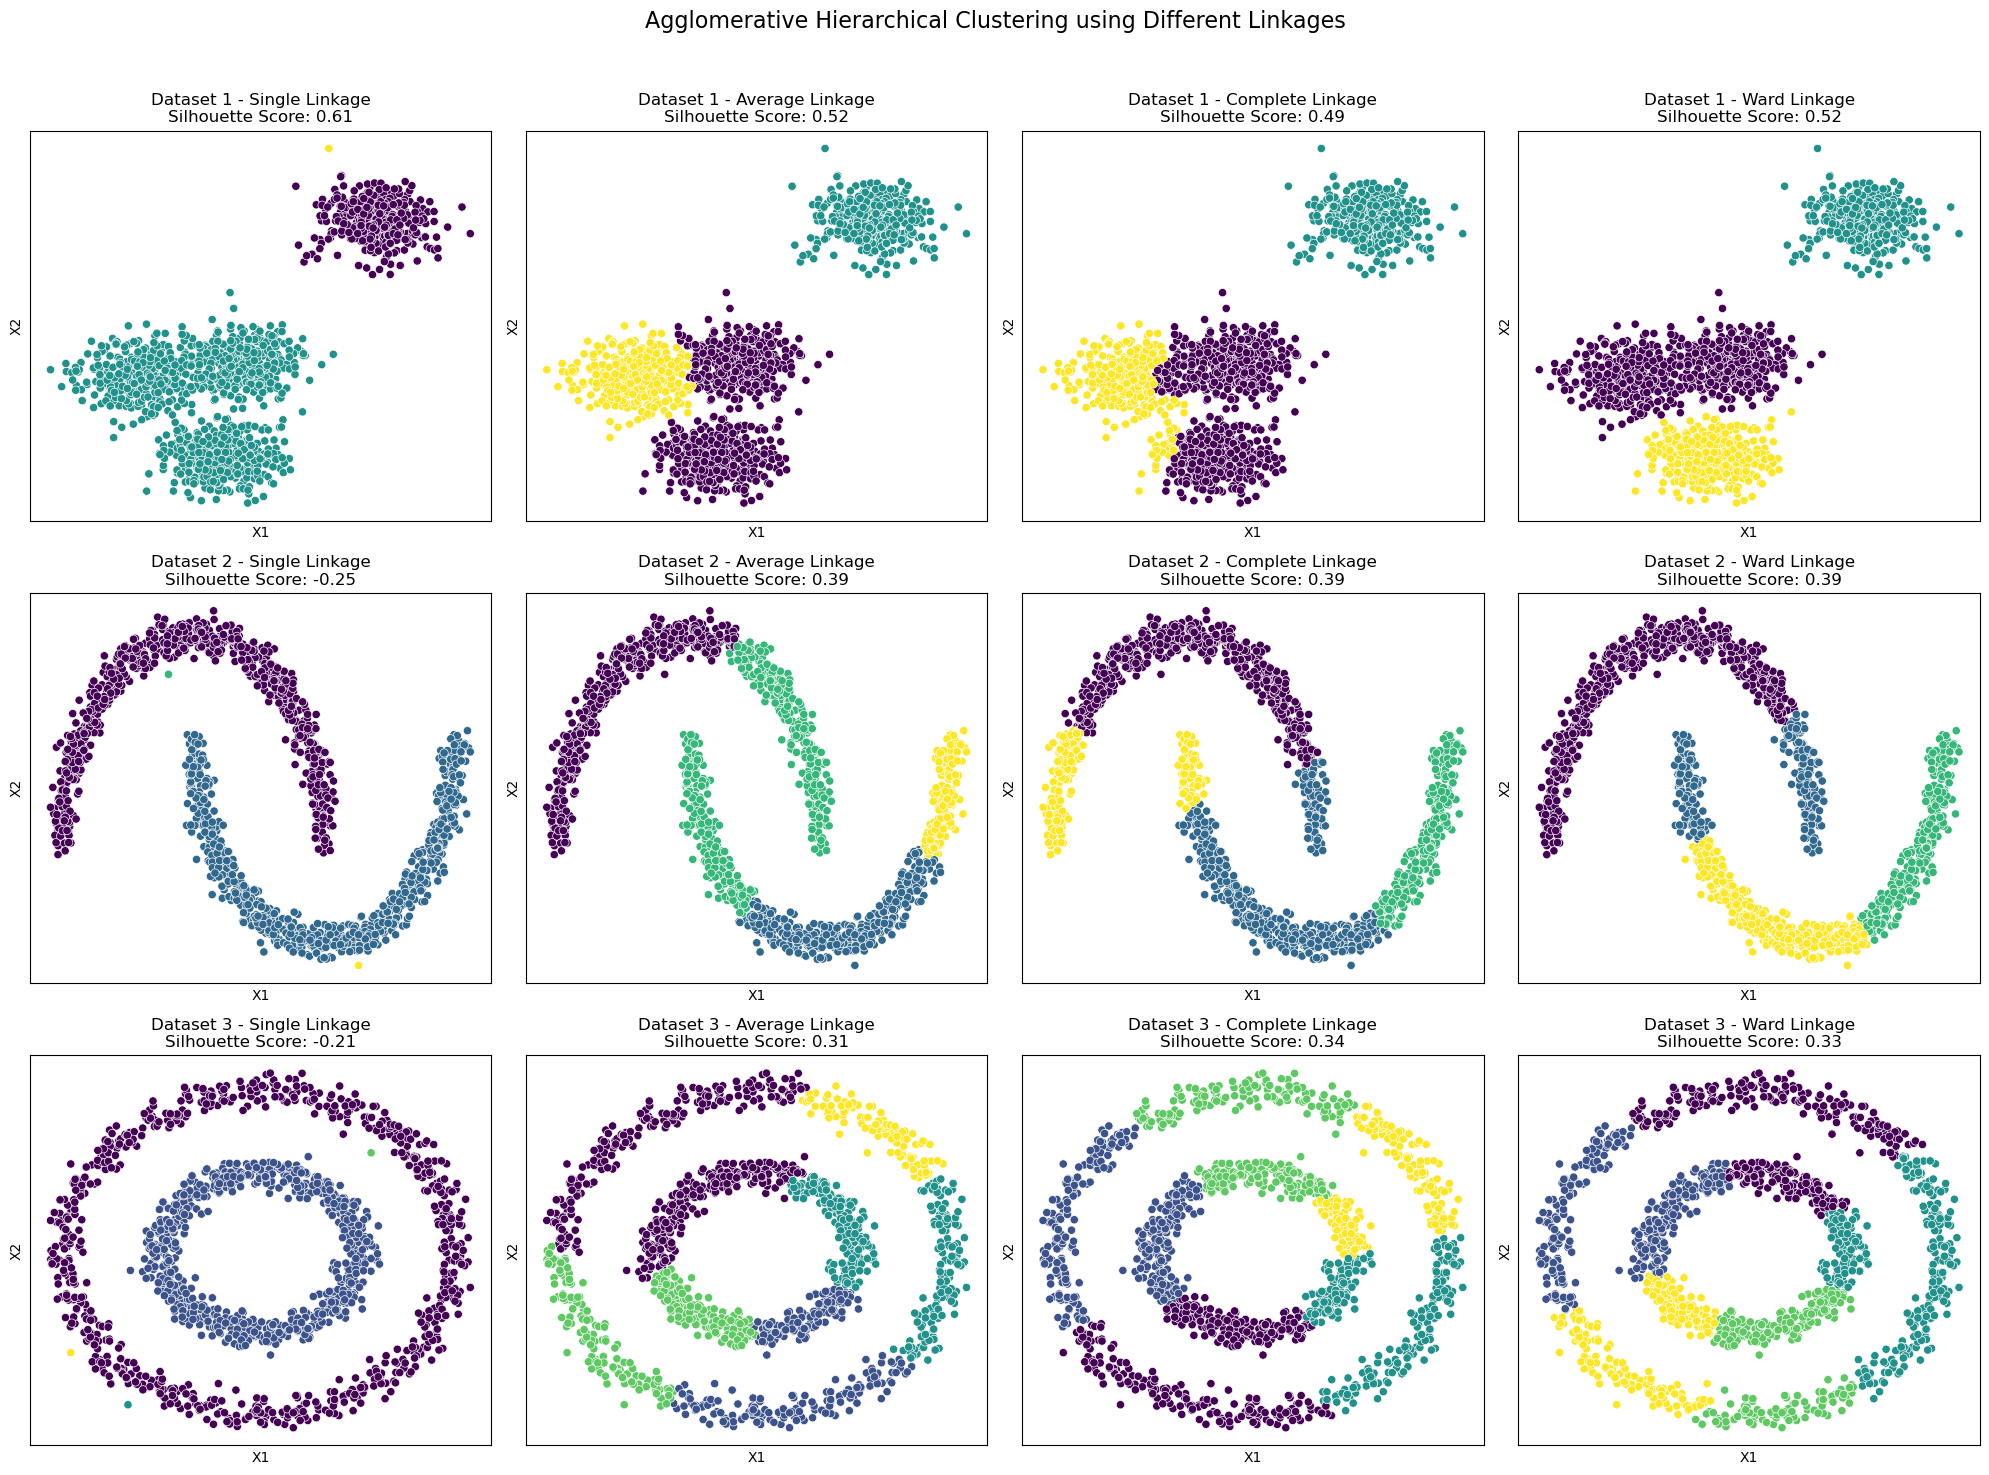

In [96]:
# Set up the figure and axes
fig, axes = plt.subplots(len(datasets_list), 4, figsize=(20, 15))
fig.suptitle('Agglomerative Hierarchical Clustering using Different Linkages', fontsize=16)

# Linkage methods
linkages = ['single', 'average', 'complete', 'ward']
linkage_names = ['Single', 'Average', 'Complete', 'Ward']

for i, (dataset, n_clusters) in enumerate(zip(datasets_list, n_clusters_list)):
    X = dataset
    X = StandardScaler().fit_transform(X)
    
    for j, (linkage, linkage_name) in enumerate(zip(linkages, linkage_names)):
        # Perform agglomerative clustering
        algorithm = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", message="the number of connected components of the connectivity matrix is [0-9]{1,2} > 1. Completing it to avoid stopping the tree early.", category=UserWarning)
            algorithm.fit(X)
        
        labels = algorithm.labels_.astype(int)
        
        # Plot the results
        ax = axes[i, j]
        silhouette_avg = silhouette_score(X, labels)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', ax=ax, legend=None)
        ax.set_title(f'{dataset_names[i]} - {linkage_name} Linkage\nSilhouette Score: {silhouette_avg:.2f}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Agglomerative hierarchical cluster Analysis
Agglomerative hierarchical clustering on three different datasets (`dataset1`, `dataset2`, `dataset3`) using four different linkage methods: Single, Average, Complete, and Ward. 

### Dataset 1
Single Linkage
- The clustering forms two distinct groups with a few outliers.
- Single linkage tends to form elongated clusters and can be sensitive to noise and outliers.

Average Linkage
- The clusters are more compact compared to single linkage.
- Average linkage balances the sensitivity to outliers and tends to form clusters of similar size.

Complete Linkage
- The clusters are compact and well-separated.
- Complete linkage often creates round-shaped clusters and is less sensitive to outliers compared to single linkage.

Ward Linkage
- The clustering is very similar to complete linkage with compact and well-separated clusters.
- Ward linkage minimizes the variance within clusters, often resulting in more spherical clusters.

### Dataset 2

Single Linkage
- The clusters appear to be elongated and poorly separated.
- Single linkage can struggle with datasets that have a lot of noise or varying densities.

Average Linkage
- The clusters are more balanced and show better separation compared to single linkage.
- There are some inconsistencies in cluster shapes, showing the average linkage's balance between sensitivity to outliers and compactness.

Complete Linkage
- The clusters are well-separated and relatively compact.
- Complete linkage provides a clearer separation of clusters compared to single linkage.

Ward Linkage
- The clusters are compact and well-separated, similar to complete linkage.
- Ward linkage provides the most distinct and spherical clusters, indicating it handles this dataset well.

### Dataset 3

Single Linkage
- The clusters are elongated and less distinct, with several overlapping points.
- Single linkage is sensitive to noise and may struggle with datasets that have overlapping clusters.

Average Linkage
- The clusters are more balanced and distinct compared to single linkage.
- Average linkage offers a compromise between sensitivity to outliers and the compactness of clusters.

Complete Linkage
- The clusters are well-separated and compact.
- Complete linkage provides clear separation and compact clusters, handling the dataset better than single linkage.

Ward Linkage
- The clusters are compact and well-separated, similar to complete linkage.
- Ward linkage again provides the most distinct and spherical clusters, showing its effectiveness on this dataset.

### Conclusion

- Single Linkage: Tends to form elongated clusters, is sensitive to noise and outliers, and may not handle overlapping clusters well.
- Average Linkage: Balances between sensitivity to outliers and compactness, forming more balanced clusters compared to single linkage.
- Complete Linkage: Creates compact and well-separated clusters, less sensitive to noise, and handles overlapping clusters better.
- Ward Linkage: Minimizes variance within clusters, resulting in the most compact and spherical clusters, and often performs best among the four methods for these datasets.